<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='400'/>

Welcome to the lab! Before we get started here are a few pointers on using this notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.
    

# Matplotlib Quick Overview

Plots in Matplotlib have a hierarchical structure that nests Python objects to create a tree-like structure. Each plot is encapsulated in a **Figure** object. This Figure is the top-level container of the visualization. It can have multiple **Axes**, which are basically individual plots inside this top-level container, where points can be specified in terms of x-y coordinates.

![figure_axes](./images/figure_axes.png)

## Parts of Figure

Below is an "anatomy" of a **Figure**, that showed components available in a Figure.  Matplotlib gives us the ability not only to display data, but customize every single bit of the plot. 

<img src='./images/anatomy.png' width=60%/>

### Figure 

The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

### Axes 

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label (set via `set_ylabel()`).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. `ax.plot()`, shown above, uses the plot method)

### Axis

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. 

### Artist 

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. 

## Coding Style 

There are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Uses pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plottin (the "scripting" style)

Below, we make the same plot using both OO style and pyplot interface.  We first load the necessary python packages:

In [2]:
# import the necessary packages 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Let us do a plot in OO style:

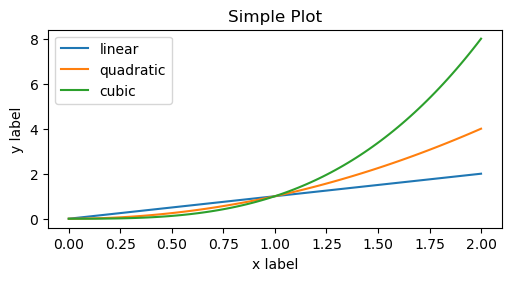

In [3]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

and in pyplot (or scripting) style:

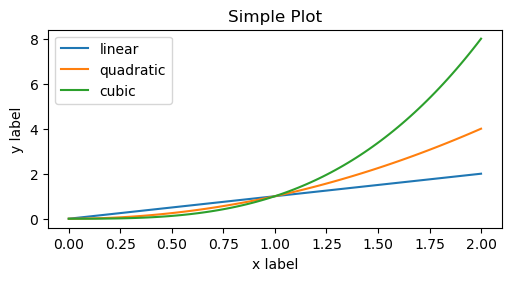

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), constrained_layout=True)
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()


Note that in the code above, we did not have an object reference to the axes. To get the axes, you can use `plt.gca()`, for example: 

```python
plt.figure()
plt.plot(...)
plt.xlabel(...)
plt.ylabel(...)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.NullLocator()) 
```

## Types of Inputs to plotting functions

Plotting functions expect `numpy.array` input, or objects that can be passed to `numpy.asarray()`.  Most methods will also parse an addressable object like a `dict`, a `numpy.recarray`, or a `pandas.DataFrame`. Matplotlib allows you provide the `data` keyword argument and generate plots passing the strings corresponding to the x and y variables. The example below shows how we can plot with pandas Dataframe object.

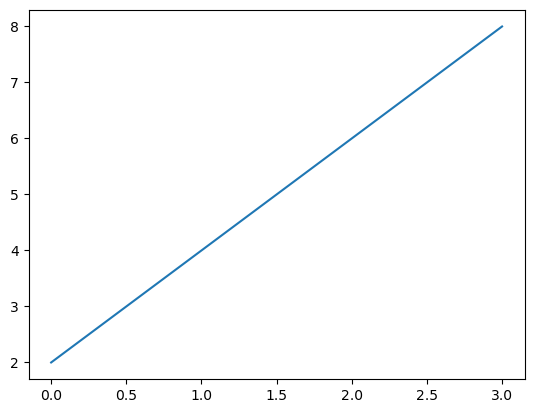

In [5]:
import pandas as pd

# let's create a dataframe with two columns 'x-key' and 'y-key'
df = pd.DataFrame(
    { 'x_key': [0, 1, 2 ,3], 
      'y_key' : [ 2, 4, 6, 8 ]
    })

plt.plot('x_key', 'y_key', data=df)

## Pyplot Basics

In most of the examples below, we will be using pyplot (scripting) style, as it contains a simpler interface for creating visualizations that allow the users to plot the data without explicitly configuring the Figure and Axes themselves. They are automatically configured to achieve the desired output. Only in cases when we need more advanced customization that cannot be done by pyplot, we will use the explicit methods on Axes and Figure.

### Creating Figures

You can use `plt.figure()` to create a new Figure. This function returns a Figure instance, but it is also passed to the backend. Every Figure-related command that follows is applied to the current Figure and does not need to know the Figure instance.

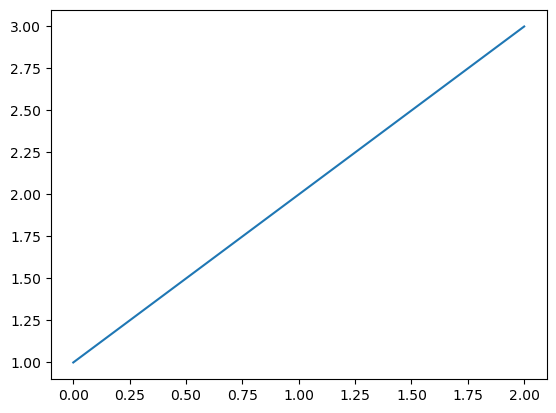

In [6]:
plt.figure()
plt.plot([1,2,3])

If we want to create more than one plots in the same figure, we have to call the subplots() method and get the reference to the Axes objects, so that we can specify which Axes to plot to.

<Figure size 640x480 with 0 Axes>

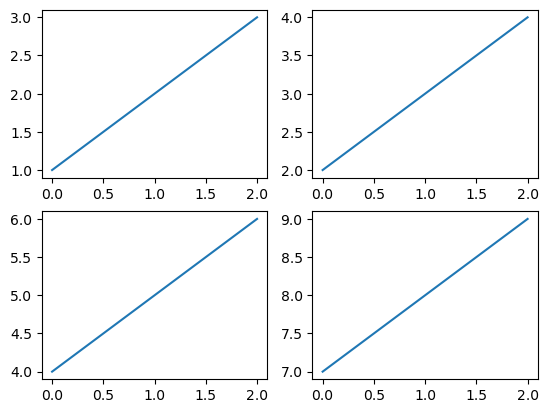

In [7]:
fig = plt.figure()  # an empty figure with no Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
axs[0][0].plot([1,2,3])
axs[0][1].plot([2,3,4])
axs[1][0].plot([4,5,6])
axs[1][1].plot([7,8,9])

By default, the Figure has a width of 6.4 inches and a height of 4.8 inches with a dpi (dots per inch) of 100. To change the default values of the Figure, we can use the parameters `figsize` and `dpi`.

The following code snippet shows how we can manipulate a Figure:

In [8]:
#To change the width and the height
plt.figure(figsize=(10, 5))
#To change the dpi
plt.figure(dpi=100)

<Figure size 640x480 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Format Strings

You can use a format string to specify colors, marker types, and line styles. A format string is specified as `[color][marker][line]`, where each item is optional. 

The following table is an example of how a color can be represented in one particular format:

|Colors|Color|
|-----|-----|
|'b'|blue|
|'r'|red|
|'g'|green|
|'m'|magenta
|'c'|cyan|
|'k'|black|
|'w'|white|
|'y'|yellow|

All the available marker options are illustrated in the following figure:

<img src='images/markers.jpg' width=60%/>

All the available line styles are illustrated in the following diagram. 

In general, solid lines should be used. We recommend restricting the use of dashed and dotted lines to either visualize some bounds/targets/goals or to depict uncertainty, for example, in a forecast:


<img src='images/line_style.jpg' width=60%/>

To conclude, format strings are a handy way to quickly customize colors, marker types, and line styles. It is also possible to use arguments, such as `color`, `marker`, and `linestyle`.

### Plotting

With `plt.plot([x], y, [fmt])`, you can plot data points as lines and/or markers. 

The function returns a list of Line2D objects representing the plotted data. 

By default, if you do not provide a format string (fmt), the data points will be connected with straight, solid lines. 

Let's try to plot something with the format string.


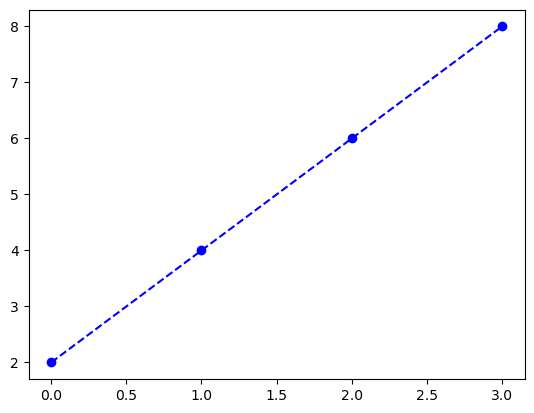

In [9]:
# plot with blue color, x marker, connected by -- line
plt.plot([0,1,2,3], [2,4,6,8], 'ob--')

To plot multiple data pairs, the syntax `plt.plot([x], y, [fmt], [x], y2, [fmt2], …)` can be used. 

Similarly, you can use `plt.plot` multiple times, since we are working on the same Figure and Axes:

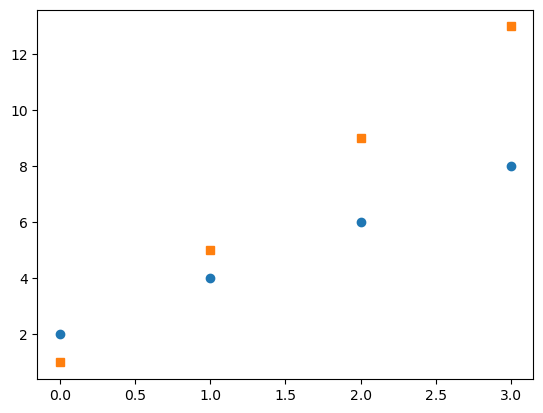

In [10]:
plt.plot([2, 4, 6, 8], 'o') 
plt.plot([1, 5, 9, 13], 's')

Any [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) properties can be used instead of format strings to further customize the plot. 

For example, the following code snippet shows how we can additionally specify the `linewidth` and `markersize` arguments:

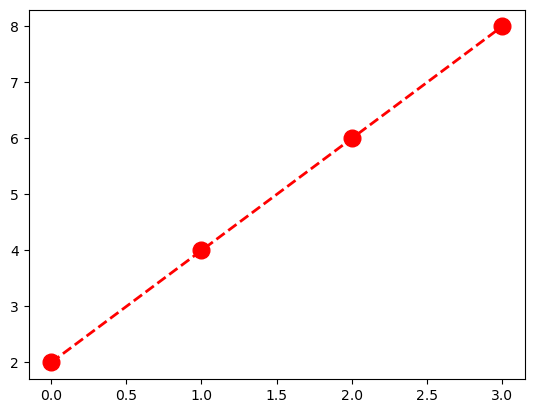

In [11]:
plt.plot([2, 4, 6, 8], color='red', marker='o', \
         linestyle='dashed', linewidth=2, markersize=12)

### Ticks

Tick locations and labels can be set manually if Matplotlib's default isn't sufficient. 

Considering the previous plot, it might be preferable to only have ticks at multiples of ones at the x-axis. One way to accomplish this is to use `plt.xticks()` and `plt.yticks()` to either get or set the ticks manually.

`plt.xticks(ticks, [labels], [**kwargs])` sets the current tick locations and labels of the x-axis.

`**kwargs (optional): matplotlib.text.Text()` properties can be used to customize the appearance of the tick labels. A quite useful property is rotation; this allows you to rotate the tick labels to use space more efficiently.

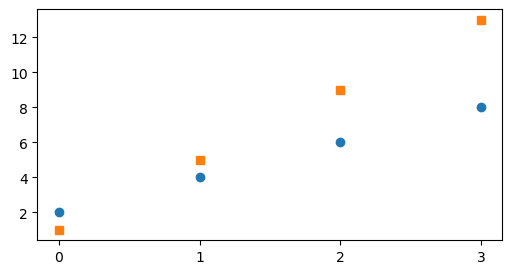

In [12]:
import numpy as np

plt.figure(figsize=(6, 3))
plt.plot([2, 4, 6, 8], 'o', [1, 5, 9, 13], 's')
plt.xticks(ticks=np.arange(4))
plt.show()

It's also possible to specify tick labels, as follows:

([<matplotlib.axis.XTick at 0x1d61d3505b0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April')])

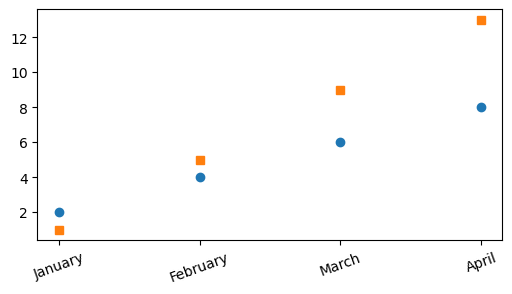

In [13]:
plt.figure(figsize=(6, 3))
plt.plot([2, 4, 6, 8], 'o', [1, 5, 9, 13], 's')
plt.xticks(ticks=np.arange(4), \
           labels=['January', 'February', 'March', 'April'], \
           rotation=20)

([<matplotlib.axis.XTick at 0x1d61efb48b0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April')])

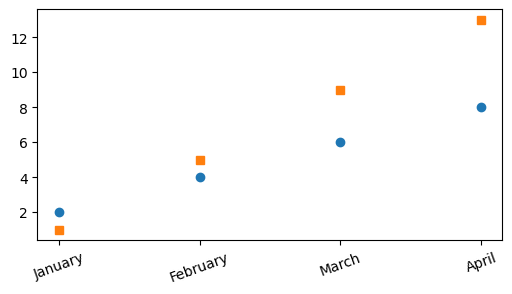

In [14]:
plt.figure(figsize=(6, 3))
plt.plot([2, 4, 6, 8], 'o', [1, 5, 9, 13], 's')
plt.xticks(ticks=np.arange(4), \
           labels=['January', 'February', 'March', 'April'], \
           rotation=20)


If you want to do even more sophisticated things with ticks, you should look into tick locators and formatters. This requires to explicitly call the Axes methods. You can get the current axes by calling '`plt.gca()`, e.g. 

```python
ax = plt.gca()
```

For example, in the plot below, when we are plotting with array of date objects on the x-axis, the dates are very cluttered together and very hard to read. 

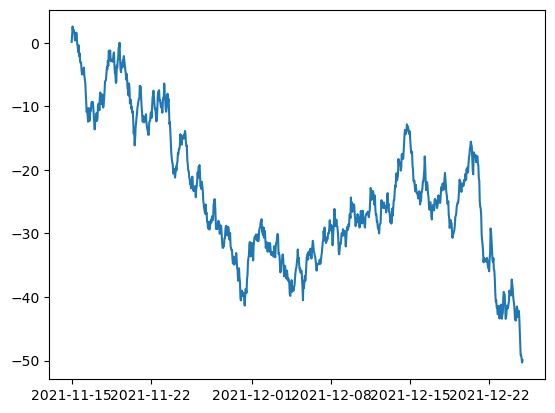

In [15]:
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
plt.plot(dates, data)

We can use formatter to better format the x-axis tick labels:

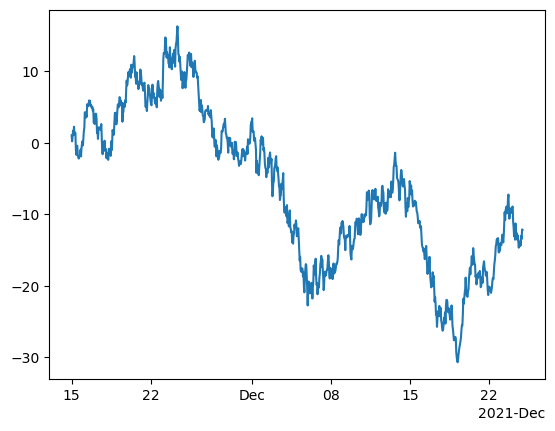

In [16]:
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
plt.plot(dates, data)
ax = plt.gca()
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

### Saving Figures
The `plt.savefig(fname)` saves the current Figure. 

There are some useful optional parameters you can specify, such as dpi, format, or transparent. The following code snippet gives an example of how you can save a Figure:

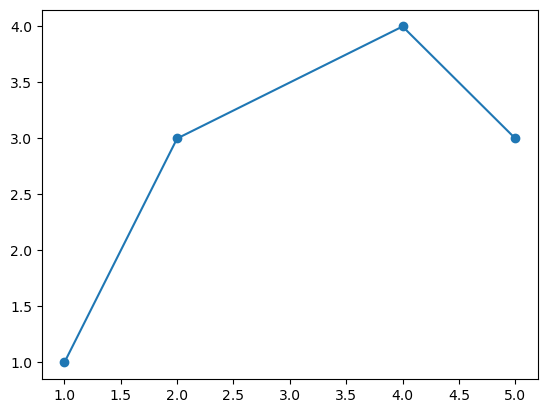

In [17]:
plt.figure()
plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')

#bbox_inches='tight' removes the outer white margins
plt.savefig('lineplot.png', dpi=300, bbox_inches='tight')

### Basic Text and Legend Functions

#### Labels

Matplotlib provides a few label functions that we can use for setting labels to the `x-` and `y-axes`. The `plt.xlabel()` and `plt.ylabel()` functions are used to set the label for the current axes. The `set_xlabel()` and `set_ylabel()` functions are used to set the label for specified axes (the OO way of doing things)

Text(0, 0.5, 'Y Label')

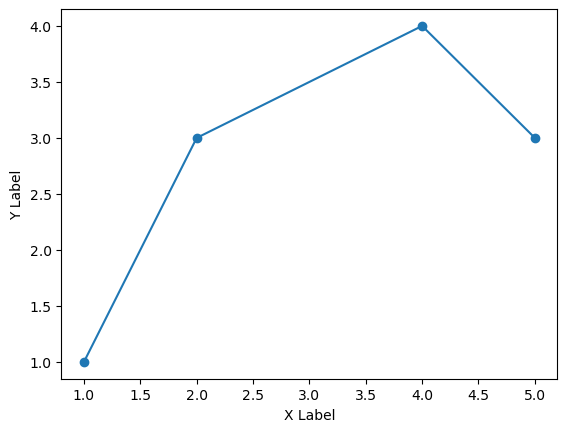

In [18]:
plt.figure()
plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
plt.xlabel('X Label')
plt.ylabel('Y Label')

## OO Style
# fig, ax  = plt.subplots()
# ax.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')

#### Titles

A title describes a particular chart/graph. The titles are placed above the axes in the center, left edge, or right edge. There are two options for titles – you can either set the Figure title or the title of an Axes. The `suptitle()` function sets the title for the current and specified Figure. The `title()` function helps in setting the title for the current and specified axes.

Text(0.5, 1.0, 'Title2')

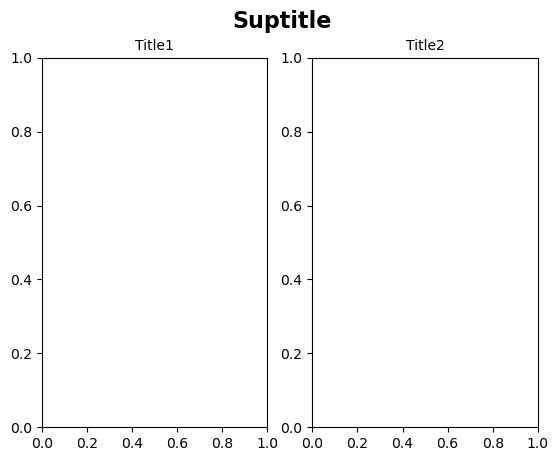

In [19]:
fig, ax  = plt.subplots(1, 2)
fig.suptitle('Suptitle', fontsize=16, fontweight='bold')
ax[0].set_title('Title1', fontsize=10)
ax[1].set_title('Title2', fontsize=10)

#### Text
There are two options for text – you can either add text to a Figure or text to an Axes. The [`plt.figtext(x, y, text)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figtext.html) add text to a Figure and [`plt.text(x, y, text)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) functions add text at locations x or y for the Axes.

The code below creates a yellow text box with the text "Text in Data Coords" on the Axes and text "Text in Figure" on the Figure.

Text(0.5, 1, 'Text in Figure')

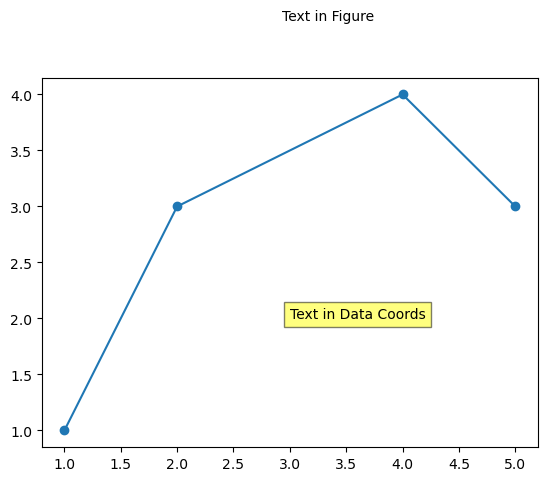

In [20]:
plt.figure()
plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
plt.text(3, 2, 'Text in Data Coords', \
        bbox={'facecolor': 'yellow', 'alpha':0.5, 'pad':4})
plt.figtext(0.5, 1, "Text in Figure")

#### Annotation 

Compared to text that is placed at an arbitrary position on the Axes, annotations are used to annotate some features of the plot. In annotations, there are two locations to consider: the annotated location, xy, and the location of the annotation text `xytext`. It is useful to specify the parameter `arrowprops`, which results in an arrow pointing to the annotated location.

Text(2, 4, 'max value')

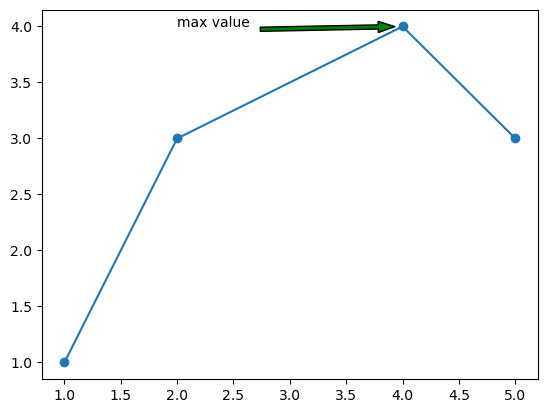

In [21]:
plt.figure()
plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
plt.annotate('max value', xy=(4,4), \
            xytext=(2,4), \
            arrowprops=dict(facecolor='green', width=3, headwidth=8, shrink=0.05))

#### Legends

Legend describes the content of the plot. To add a legend to your Axes, we have to specify the label parameter at the time of plot creation. 
Calling `plt.legend()` for the current Axes or `Axes.legend()` for a specific Axes will add the legend. 
The optional `loc` parameter specifies the location of the legend.

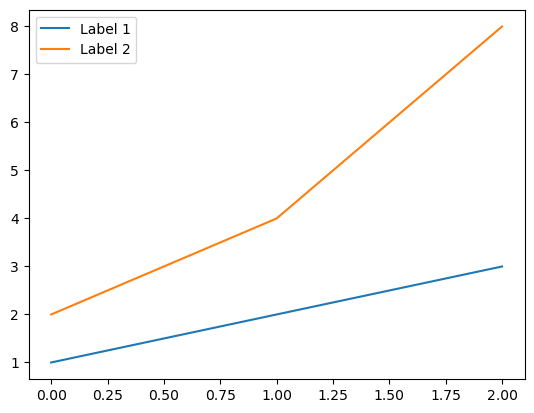

In [22]:
plt.plot([1, 2, 3], label='Label 1')
plt.plot([2, 4, 8], label='Label 2')
plt.legend(loc='upper left')

### Scale

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. 

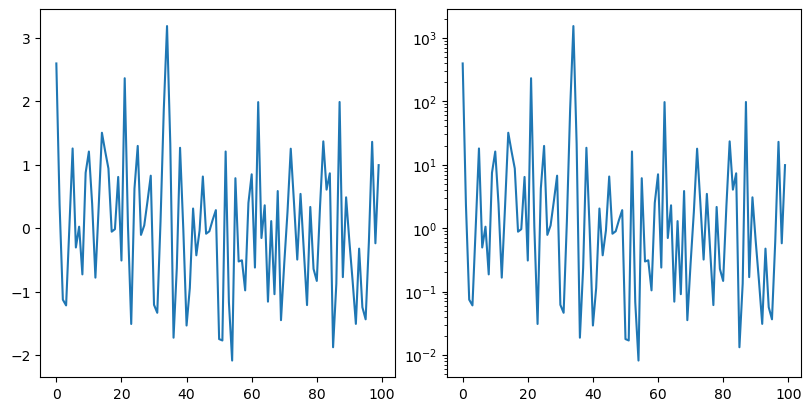

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='constrained')
data = np.random.randn(100)
xdata = np.arange(len(data))  # make an ordinal for this
data1 = 10**data
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data1)
plt.show()

### Additional Axis objects

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using `twinx` to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for `twiny`). See Plots with different scales for another example.


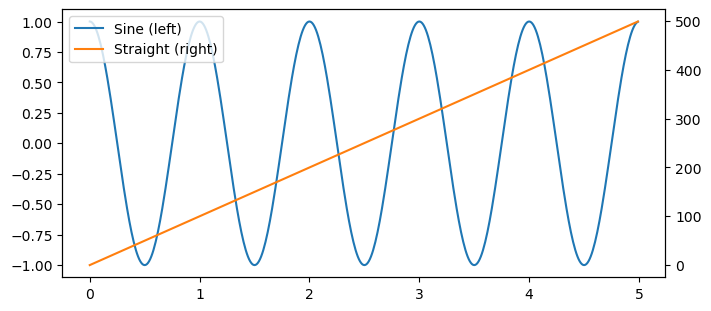

In [24]:
# generate some data 
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

# do the plot
plt.figure(figsize=(7,3), layout='constrained')
l1 = plt.plot(t, s)
plt.twinx()
l2 = plt.plot(t, range(len(t)), 'C1')
l = l1+l2
plt.legend(l, ['Sine (left)', 'Straight (right)'])

## OO-style 
# fig, ax = plt.subplots(figsize=(7, 3), layout='constrained')
# l1, = ax.plot(t, s)
# ax1 = ax.twinx()
# l2, = ax1.plot(t, range(len(t)), 'C1')
# ax1.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

## Exercise

In this activity, we will create a line plot to show stock trends. The aim of this activity is to not just visualize the data but to use labels, a title, and a legend to make the visualization self-explanatory and "complete."

Let's look at the following scenario: 

You are interested in investing in stocks. You downloaded the stock prices for the "big five": Amazon, Google, Apple, Facebook, and Microsoft. You want to visualize the closing prices in dollars to identify trends. This dataset is available in the Datasets folder that you had downloaded initially. The following are the steps to perform:

1. Import the necessary modules and enable plotting within a Jupyter Notebook.
2. Use pandas to read the datasets (GOOGL_data.csv, FB_data.csv, AAPL_data.csv, AMZN_data.csv, and MSFT_data.csv) located in the Datasets folder. The `read_csv()` function reads a .csv file into a DataFrame.
3. Use Matplotlib to create a line chart visualizing the closing prices for the past 5 years (whole data sequence) for all five companies. Add labels, titles, and a legend to make the visualization self-explanatory. Use `plt.grid()` to add a grid to your plot. If necessary, adjust the ticks in order to make them readable.


Your expected output should look like this: 

<img src='images/ex1_output.png' width=100% />


Text(0.5, 1.0, 'Stock Trend')

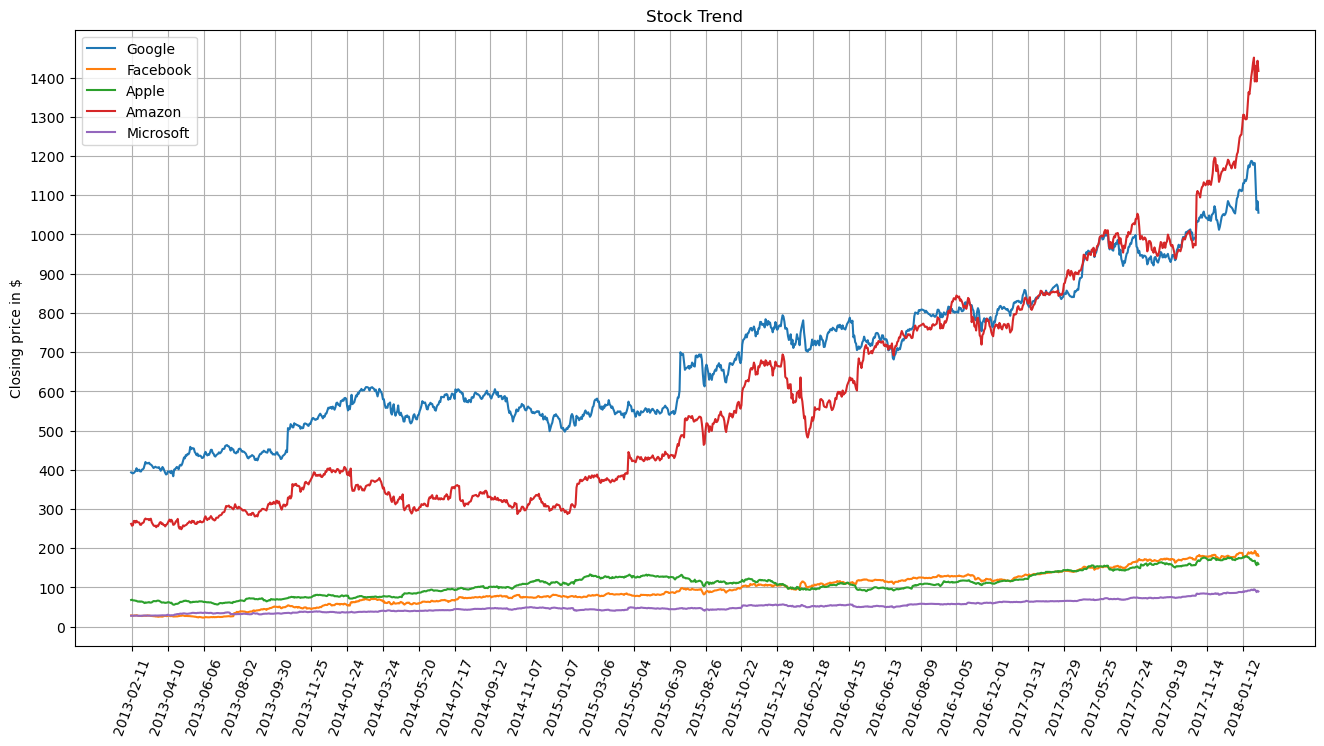

In [26]:
### TODO: code here 

import matplotlib.pyplot as plt
import pandas as pd 

# Step 2: Read the datasets
google_df = pd.read_csv('https://raw.githubusercontent.com/nyp-sit/agods/main/day3/datasets/GOOGL_data.csv')
apple_df = pd.read_csv('https://raw.githubusercontent.com/nyp-sit/agods/main/day3/datasets/AAPL_data.csv')
microsoft_df = pd.read_csv('https://raw.githubusercontent.com/nyp-sit/agods/main/day3/datasets/MSFT_data.csv')
amazon_df = pd.read_csv('https://raw.githubusercontent.com/nyp-sit/agods/main/day3/datasets/AMZN_data.csv')
facebook_df = pd.read_csv('https://raw.githubusercontent.com/nyp-sit/agods/main/day3/datasets/FB_data.csv')

# Step 3: create a line chart 
plt.figure(figsize=(16, 8))
plt.plot('date', 'close', data=google_df, label='Google')
plt.plot('date', 'close', data=facebook_df, label='Facebook')
plt.plot('date', 'close', data=apple_df, label='Apple')
plt.plot('date', 'close', data=amazon_df, label='Amazon')
plt.plot('date', 'close', data=microsoft_df, label='Microsoft')
plt.xticks(np.arange(1, 1260, 40), rotation=70)
plt.yticks(np.arange(0, 1450, 100))
plt.legend()
plt.grid()
plt.ylabel("Closing price in $")
plt.title('Stock Trend')

### Solution 

Click on the '...' below to see the solution.

Text(0.5, 1.0, 'Stock Trend')

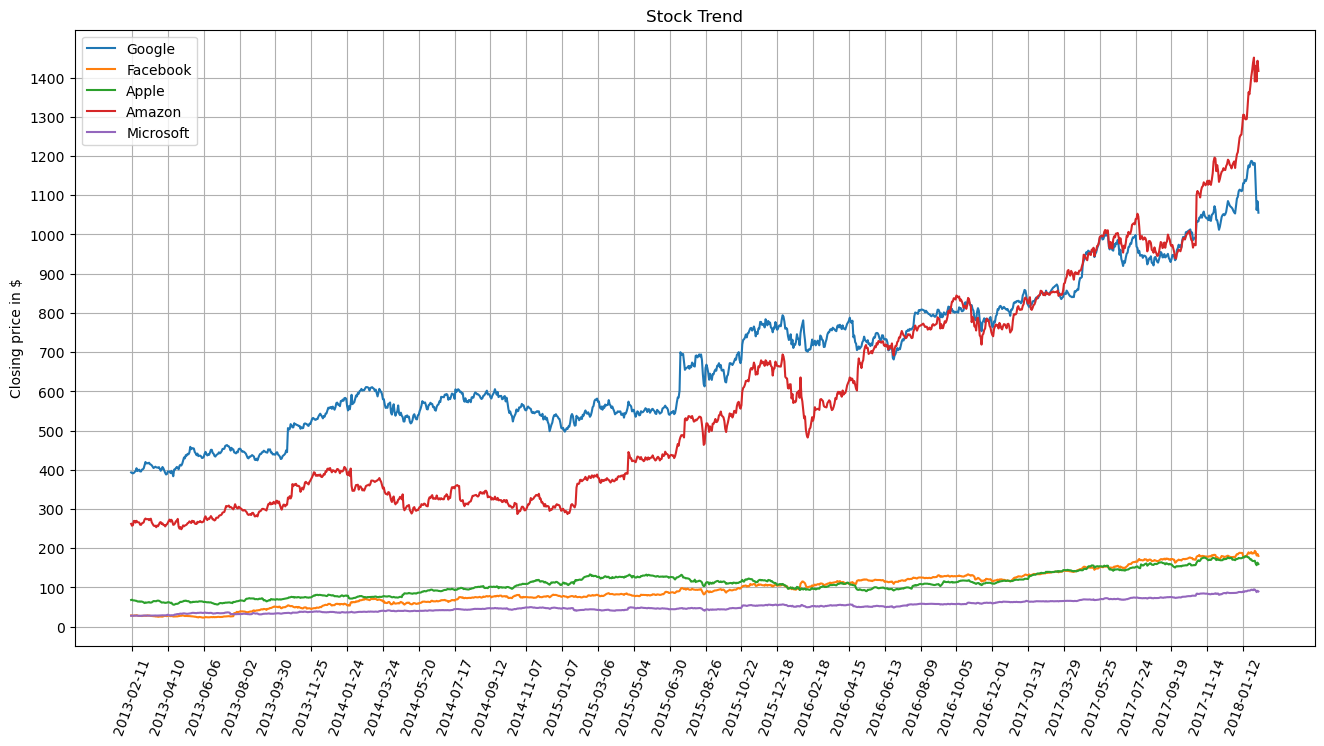

In [25]:
# SOLUTION
import matplotlib.pyplot as plt
import pandas as pd 

# Step 2: Read the datasets
google_df = pd.read_csv('datasets/GOOGL_data.csv')
apple_df = pd.read_csv('datasets/AAPL_data.csv')
microsoft_df = pd.read_csv('datasets/MSFT_data.csv')
amazon_df = pd.read_csv('datasets/AMZN_data.csv')
facebook_df = pd.read_csv('datasets/FB_data.csv')

# Step 3: create a line chart 
plt.figure(figsize=(16, 8))
plt.plot('date', 'close', data=google_df, label='Google')
plt.plot('date', 'close', data=facebook_df, label='Facebook')
plt.plot('date', 'close', data=apple_df, label='Apple')
plt.plot('date', 'close', data=amazon_df, label='Amazon')
plt.plot('date', 'close', data=microsoft_df, label='Microsoft')
plt.xticks(np.arange(1, 1260, 40), rotation=70)
plt.yticks(np.arange(0, 1450, 100))
plt.legend()
plt.grid()
plt.ylabel("Closing price in $")
plt.title('Stock Trend')
